<h1>Extracting Stock Data Using a Python Library and a Web Scraping</h1>


## Import the important libraties


In [50]:

# For handling data
import pandas as pd

# For working with stock data
import yfinance as yf

# For web scraping
import requests
from bs4 import BeautifulSoup

# For data visualization (used in graphing stock data)
import matplotlib.pyplot as plt


### Question 1: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below

In [51]:
# step 1: Create Ticker object 
tesla = yf.Ticker("TSLA") 
# step 2: Extract historical stock data 
tesla_data = tesla.history(period="max") 
# step 3: Reset index 
tesla_data.reset_index(inplace=True) 
# step 4: Display first five rows 
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### Question 2: Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.

In [ ]:
import requests 
from bs4 import BeautifulSoup 
# URL of the financials page 
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
# step 1 Send GET request 
html_data = requests.get(url).text 
# step 2 Parse HTML 
soup = BeautifulSoup(html_data, "html.parser") 
# step 3 Find the correct table 
tables = soup.find_all("table") 
for table in tables: 
    if "Tesla Quarterly Revenue" in str(table): 
        revenue_table = table 
        break 
#step 4 Extract revenue data 
tesla_revenue = pd.read_html(str(revenue_table))[0]

# step 5 Clean column names and drop NA 
tesla_revenue.columns = ["Date", "Revenue"] 
tesla_revenue.dropna(inplace=True) 
# step 6 Display last five rows 
tesla_revenue.tail()

### Question 3: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.



In [57]:
# step 1 Create Ticker object for GME 
gme = yf.Ticker("GME") 
# step 2 Extract historical stock data 
gme_data = gme.history(period="max") 
# step 3 Reset index 
gme_data.reset_index(inplace=True) 
# step 4 Display first five rows 
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670627,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


### Question 4: Use Webscraping to Extract GME Revenue Data

Display the last five rows of the gme_revenue dataframe using the tail function.

In [59]:
!pip install html5lib

In [ ]:
# URL for GameStop revenue 
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue" 
# Fetch and parse the HTML 
html_data = requests.get(url).text 
soup = BeautifulSoup(html_data, "html.parser") 
# Find the correct revenue table 
tables = soup.find_all("table") 
for table in tables: 
    if "GameStop Quarterly Revenue" in str(table): 
        revenue_table = table 
        break 
# Convert to DataFrame 
gme_revenue = pd.read_html(str(revenue_table))[0] 
gme_revenue.columns = ["Date", "Revenue"] 
gme_revenue.dropna(inplace=True) 

# Display last five rows 
gme_revenue.tail()

### Question 5: Plot Tesla Stock Graph

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

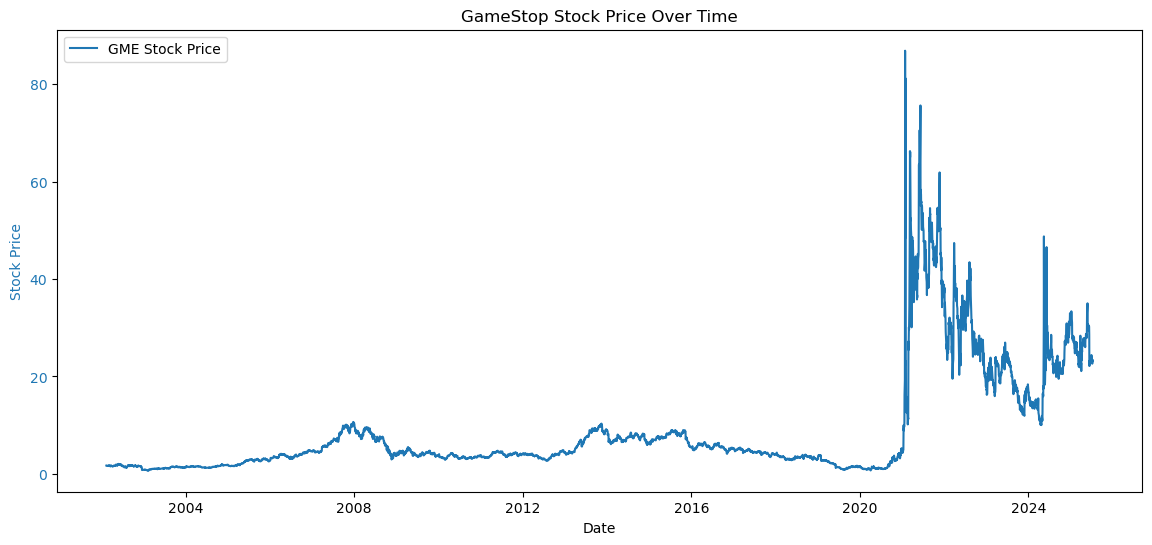

In [63]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock, title):
    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Plot stock price
    ax1.plot(stock_data.Date, stock_data.Close, color="tab:blue", label=f"{stock} Stock Price")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price", color="tab:blue")
    ax1.tick_params(axis='y', labelcolor="tab:blue")
    ax1.set_title(title)
    ax1.legend(loc="upper left")
    plt.show()

# Use the function
make_graph(gme_data, gme_revenue, "GME", "GameStop Stock Price Over Time")


### Question 6: Plot GameStop Stock Graph

Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

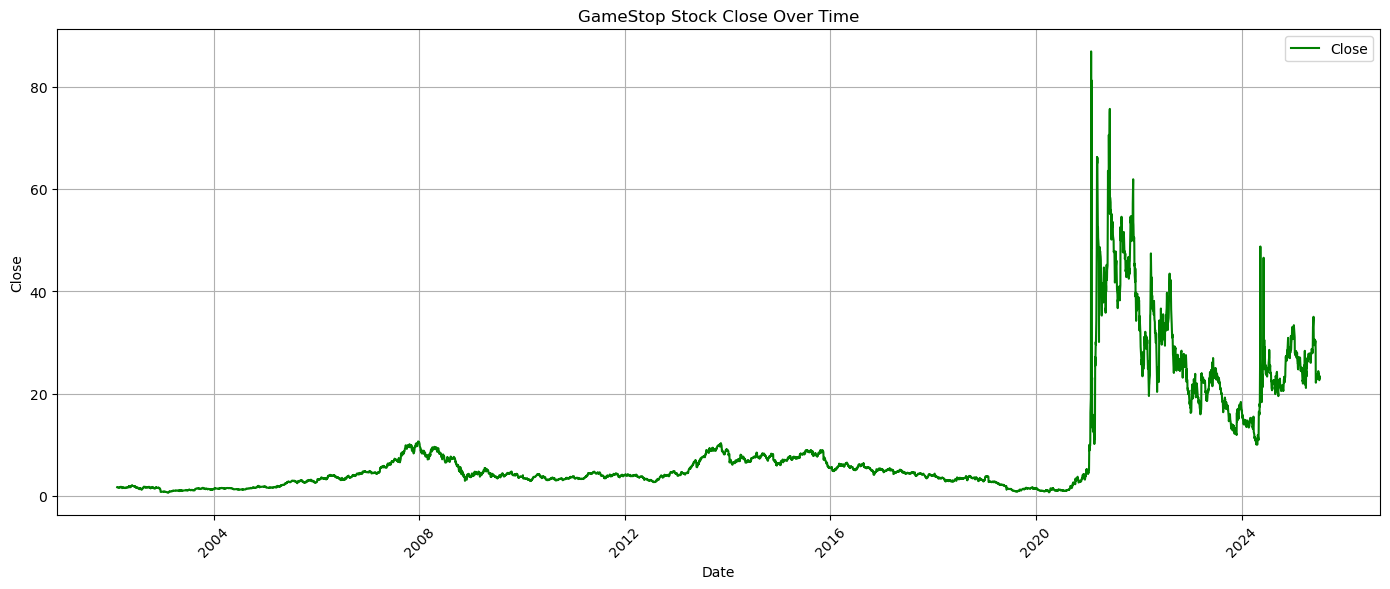

In [45]:
# Function to plot the stock data 
def make_graph(data, stock, col):
    plt.figure(figsize=(14, 6))
    plt.plot(data['Date'], data[col], label=col, color='green')
    plt.title(f"{stock} Stock {col} Over Time")
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot the GameStop stock closing price
make_graph(gme_data, 'GameStop', 'Close')
